In [13]:
import torch
import gudhi as gh
import gudhi.representations as gh_repr
import numpy as np
import ot

In [229]:
A = torch.randn((40, 768), requires_grad=True)

In [328]:
def entropy_loss(points: torch.TensorType, max_dim: int = 2):

    # Note: may consider using log1p with \frac{\sum_{i!=j} p_i}{\sum_i p_i}
    
    # default value
    ent = 0
    # compute persistence
    vr = gh.RipsComplex(points=points).create_simplex_tree(max_dimension=max_dim)
    vr.compute_persistence()
    # get critical simplices
    ind0, ind1 = vr.flag_persistence_generators()[:-2]
    
    res0 = torch.norm(points[ind0[:, 1]] - points[ind0[:, 2]], dim=-1)
    ent0 = -torch.sum((res0/torch.sum(res0))*torch.log(res0/torch.sum(res0)))
    
    # compute entropy for higher dimensional simplices 
    for i in ind1:
        res = torch.norm(points[i[:, (0, 2)]] - points[i[:, (1, 3)]], dim=-1)
        lens = res[:, 1] - res[:, 0]
        ent += -torch.sum((lens/torch.sum(lens))*torch.log(lens/torch.sum(lens)))
        
    return ent + ent0

In [334]:
def diagram_divergence_loss(ref: torch.Tensor, cur: torch.Tensor, max_dim: int = 2):

    was_dist = .0
    
    vr_ref = gh.RipsComplex(points=ref).create_simplex_tree(max_dimension=max_dim)
    vr_ref.compute_persistence()
    vr_cur = gh.RipsComplex(points=cur).create_simplex_tree(max_dimension=max_dim)
    vr_cur.compute_persistence()

    ind0_ref, ind1_ref = vr_ref.flag_persistence_generators()[:-2]
    ind0_cur, ind1_cur = vr_ref.flag_persistence_generators()[:-2]

    crit_ref0 = torch.norm(ref[ind0_ref[:, (0, 1)]] - ref[ind0_ref[:,(0, 2)]], dim=-1)
    crit_cur0 = torch.norm(cur[ind0_cur[:, (0, 1)]] - cur[ind0_cur[:,(0, 2)]], dim=-1)

    zero_ord_dist = ot.sliced_wasserstein_distance(crit_ref0, crit_cur0)

    for i in range(len(ind1_cur)):
        
        crit_ref = torch.norm(ref[ind1_ref[i][:, (0, 2)]] - ref[ind1_ref[i][:,(1, 3)]], dim=-1)
        crit_cur = torch.norm(cur[ind1_cur[i][:, (0, 2)]] - cur[ind1_cur[i][:,(1, 3)]], dim=-1)

        was_dist += ot.sliced_wasserstein_distance(crit_ref, crit_cur)

    return was_dist
    

In [313]:
ot.sliced_wasserstein_distance(np.array([[5], [4], [3]]), np.array([[6], [1]]))

0.0

In [230]:
vr = gh.RipsComplex(points=A).create_simplex_tree(max_dimension=2, )

In [317]:
vr.flag_persistence_generators()[0]

array([[39, 39,  6],
       [32, 32, 17],
       [14, 14,  2],
       [ 6,  6,  2],
       [30, 30, 24],
       [22, 22,  2],
       [20, 20, 17],
       [24, 30,  8],
       [ 2, 39, 17],
       [17, 39, 30],
       [ 9,  9,  2],
       [34, 34, 12],
       [25, 25, 17],
       [10, 10,  3],
       [31, 31, 14],
       [ 8, 30, 27],
       [29, 29, 22],
       [27, 39, 34],
       [ 3, 10,  2],
       [16, 16,  5],
       [37, 37, 16],
       [35, 35,  3],
       [12, 35,  0],
       [33, 33,  2],
       [ 0, 35, 26],
       [11, 11,  4],
       [ 4, 11,  9],
       [26, 30, 21],
       [15, 15,  6],
       [21, 14,  5],
       [18, 18, 11],
       [ 5, 39, 19],
       [28, 28, 19],
       [19, 19, 13],
       [23, 23, 16],
       [38, 38,  0],
       [13, 34,  1],
       [ 1, 35,  7],
       [36, 36, 10]])

In [257]:
vr.compute_persistence(persistence_dim_max=True)

In [137]:
zero_dim = vr.persistence_intervals_in_dimension(0)
one_dim = vr.persistence_intervals_in_dimension(1)

In [253]:
vr.persistence_intervals_in_dimension()

array([], shape=(0, 2), dtype=float64)

<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

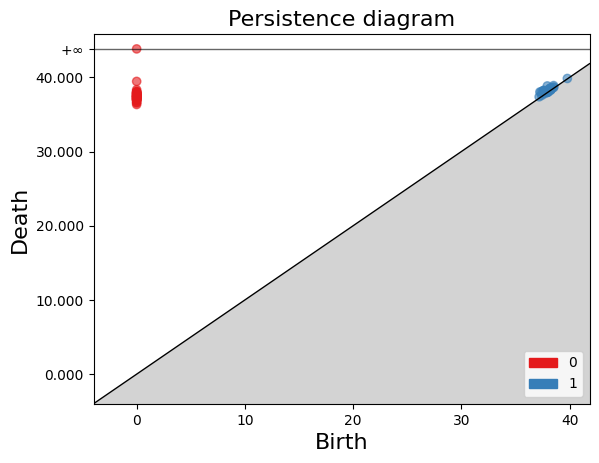

In [325]:
gh.plot_persistence_diagram(vr.persistence())

In [138]:
zero_dim = zero_dim[zero_dim[:, 1] != np.inf]
one_dim = one_dim[one_dim[:, 1] != np.inf]

In [139]:
ent = gh_repr.Entropy()
ent.transform([zero_dim, one_dim])

array([[3.66348797],
       [3.15461728]])

In [86]:
p = tr[1][:, 1]

np.sum((p/np.sum(p))*np.log((p/np.sum(p))))

-3.1546172828567416

In [63]:
tr = gh_repr.BirthPersistenceTransform().fit_transform([zero_dim, one_dim])

In [93]:
len(vr.flag_persistence_generators())

4

In [318]:
i0 = vr.flag_persistence_generators()[0]

In [248]:
i1 = vr.flag_persistence_generators()[1][0]

In [249]:
res = torch.norm(A[i1[:, (0, 2)]] - A[i1[:, (1, 3)]], dim=-1)

In [324]:
torch.norm(A[i0[:, (0, 1)]] - A[i0[:, (0, 2)]], dim=-1)

tensor([[ 0.0000, 36.3361],
        [ 0.0000, 36.5635],
        [ 0.0000, 36.6219],
        [ 0.0000, 36.8048],
        [ 0.0000, 36.9430],
        [ 0.0000, 36.9468],
        [ 0.0000, 37.0035],
        [ 0.0000, 37.0254],
        [ 0.0000, 37.0318],
        [ 0.0000, 37.0555],
        [ 0.0000, 37.1376],
        [ 0.0000, 37.1737],
        [ 0.0000, 37.1748],
        [ 0.0000, 37.2485],
        [ 0.0000, 37.2842],
        [ 0.0000, 37.2971],
        [ 0.0000, 37.2987],
        [ 0.0000, 37.3600],
        [ 0.0000, 37.4175],
        [ 0.0000, 37.4299],
        [ 0.0000, 37.4382],
        [ 0.0000, 37.4836],
        [ 0.0000, 37.5010],
        [ 0.0000, 37.5230],
        [ 0.0000, 37.5511],
        [ 0.0000, 37.5938],
        [ 0.0000, 37.6178],
        [ 0.0000, 37.7347],
        [ 0.0000, 37.7510],
        [ 0.0000, 37.7573],
        [ 0.0000, 37.8148],
        [ 0.0000, 37.8435],
        [ 0.0000, 37.9109],
        [ 0.0000, 37.9147],
        [ 0.0000, 37.9927],
        [ 0.0000, 38

In [175]:
res0

tensor([36.4753, 36.6432, 36.8254, 36.9166, 36.9209, 36.9509, 36.9787, 37.0179,
        37.0220, 37.0468, 37.1641, 37.1898, 37.2384, 37.2393, 37.2418, 37.2484,
        37.2527, 37.2550, 37.2928, 37.3845, 37.3949, 37.4241, 37.4256, 37.4778,
        37.4824, 37.4966, 37.5154, 37.5723, 37.6162, 37.6698, 37.6909, 37.7282,
        37.8065, 37.9632, 37.9753, 38.2040, 38.2807, 38.4080, 38.4779],
       grad_fn=<LinalgVectorNormBackward0>)

In [171]:
tr = res[:, 1] - res[:, 0]

In [172]:
-torch.sum((tr/torch.sum(tr))*torch.log(tr/torch.sum(tr)))

tensor(3.1546, grad_fn=<NegBackward0>)

In [176]:
tr = res0

In [177]:
tr = res0

-torch.sum((tr/torch.sum(tr))*torch.log(tr/torch.sum(tr)))

tensor(3.6635, grad_fn=<NegBackward0>)

In [191]:
A

tensor([[-0.9218, -1.7972, -1.3280,  ..., -0.6402,  0.5085, -1.8781],
        [ 0.2180,  1.1355,  0.2463,  ..., -0.3221,  0.4792, -0.3515],
        [-0.8792, -0.6742,  0.9407,  ...,  0.9079,  1.4243, -0.1764],
        ...,
        [-1.4017, -1.2443, -0.2590,  ..., -0.5215,  1.1337,  0.5495],
        [-0.7889,  1.7631,  0.5900,  ...,  0.4103,  0.0181,  0.4155],
        [-0.0673, -0.8204, -1.2915,  ..., -1.1716,  0.0454, -2.4388]],
       requires_grad=True)

In [192]:
B = torch.rand((40, 768), requires_grad=True)

In [197]:
vr2 = gh.RipsComplex(points=B).create_simplex_tree(max_dimension=2)
vr2.compute_persistence()

In [202]:
pers1 = vr.persistence_intervals_in_dimension(1)

In [203]:
pers2 = vr2.persistence_intervals_in_dimension(1)

In [213]:
sl = gh_repr.metrics.SlicedWassersteinDistance()

In [314]:
ot.sliced_wasserstein_distance(torch.tensor(pers1, requires_grad=True), torch.tensor(pers2, requires_grad=True), p=2)

tensor(27.3447, dtype=torch.float64, grad_fn=<PowBackward0>)

In [294]:
pers1.shape

(34, 2)

In [295]:
pers2.shape

(40, 2)

In [251]:
len(vr.flag_persistence_generators()[1][0])

741

In [252]:
res.shape

torch.Size([741, 2])

In [224]:
i2 = vr2.flag_persistence_generators()[1][0]

In [225]:
res2 = torch.norm(B[i2[:, (0, 2)]] - B[i2[:, (1, 3)]], dim=-1)

In [226]:
res2.shape

torch.Size([40, 2])